In [14]:
import mne
from mne.time_frequency import psd_array_multitaper
import numpy as np
import matplotlib.pyplot as plt

In [15]:
edf_path = 'PD129.edf'
raw = mne.io.read_raw_edf(edf_path,preload=True)

Extracting EDF parameters from c:\Users\splaw\Desktop\dyplom\eegParkinsonCognitiveDisorders\PD129.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 755199  =      0.000 ...  1474.998 secs...


In [16]:
picks = mne.pick_types(raw.info, eeg=True)
raw.filter(1, 40, picks=picks)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



<RawEDF | PD129.edf, 20 x 755200 (1475.0 s), ~115.3 MB, data loaded>

In [17]:
tmin, tmax = 0, 1 
events = mne.make_fixed_length_events(raw, duration=1.0)
epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, picks=picks, baseline=(0, 0))

Not setting metadata
1475 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [19]:
psds, freqs = psd_array_multitaper(epochs.get_data(), sfreq=raw.info['sfreq'], fmax=100)

Using data from preloaded Raw for 1475 events and 513 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


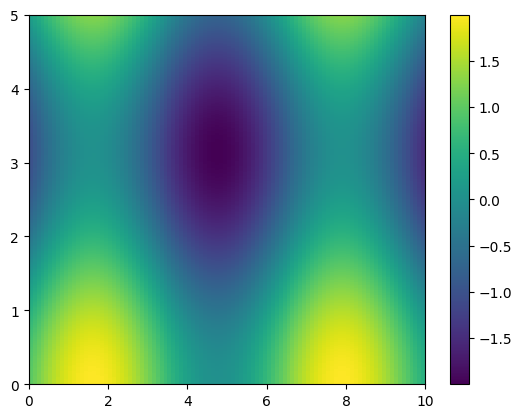

In [26]:
x = np.linspace(0, 10, num=101)
y = np.linspace(0, 5, num=513)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)
Z_slice = Z[:-1, :-1]
fig, ax = plt.subplots()
pcm = ax.pcolormesh(X, Y, Z_slice, shading='flat')
fig.colorbar(pcm, ax=ax)
plt.show()